<a href="https://colab.research.google.com/github/farazmalik180/-EXPLORING-THE-BITCOIN-CRYPTOCURRENCY-MARKET/blob/master/Copy_of_Plastic_Injection_Moulding_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lightgbm

In [ ]:
pip install tensorflow

In [ ]:
pip install pandas numpy scikit-learn lightgbm streamlit matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow==2.10.0 pandas numpy matplotlib seaborn scipy scikit-learn lightgbm streamlit pyngrok


ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.10.0


# Plastic Injection Moulding Quality Prediction

## Overview
This project aims to predict the quality of plastic injection moulded parts using machine learning models. The dataset (`dataset.csv`) contains features related to the moulding process (e.g., `Melt temperature`, `Mold temperature`, `time_to_fill`) and a target variable `quality` (1=Waste, 2=Acceptable, 3=Target, 4=Inefficient). The project is divided into four sections:

- **Section 1 (15%)**: Data Preprocessing & Exploratory Data Analysis (EDA)
- **Section 2 (15%)**: Hypothesis Testing & ANOVA
- **Section 3 (40%)**: Machine Learning Model Development (including ANN, which is mandatory)
- **Section 4 (20%)**: Interactive Dashboard Development using Streamlit

## Environment Setup
The script uses TensorFlow for the ANN model, which has caused issues locally on Windows (Python 3.9) due to version compatibility and DLL errors. TensorFlow 2.10.0 is not available for Python 3.9, so we’ll use TensorFlow 2.12.0, the earliest compatible version. If DLL errors persist, run this script in WSL or Google Colab, where TensorFlow worked previously.

## Section 0: Import Libraries
### Purpose
Import all necessary libraries for data handling, visualization, statistical analysis, and machine learning.

### Thought Process
- `pandas` and `numpy` for data manipulation.
- `matplotlib` and `seaborn` for visualization.
- `scipy.stats` for ANOVA.
- `sklearn` for preprocessing, model training, and evaluation.
- `lightgbm` for the LightGBM model.
- `tensorflow` for the ANN model (mandatory).
- `warnings` to suppress unnecessary warnings.
- Set a random seed with `np.random.seed(42)` for reproducibility.

### Expected Observation
Libraries should import successfully. TensorFlow 2.12.0 is used to ensure compatibility with Python 3.9.

In [ ]:
# Section 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, skew, kurtosis
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

## Section 0: Load Dataset
### Purpose
Load the `dataset.csv` file, which contains the features and target variable `quality`.

### Thought Process
- Use `latin1` encoding to handle potential encoding issues with the CSV file.
- The dataset should have columns like `Melt temperature`, `Mold temperature`, etc., and `quality` as the target.

### Expected Observation
Dataset should load successfully. Ensure the file is in the same directory as this notebook.

In [ ]:
# Section 0: Load Dataset
data = pd.read_csv('Dataset.csv', encoding='latin1')

## Section 1: Data Preprocessing & EDA (15%)
### Dataset Overview
#### Purpose
Understand the dataset's structure, check for missing values, and explore the data distribution.

#### Thought Process
- Check the shape to understand the number of rows and columns.
- Check data types to ensure features are numerical.
- Check for missing values to decide if imputation is needed.

#### Expected Observation
The dataset should have multiple features and a `quality` target. Expect no missing values based on prior runs, but confirm here.

In [ ]:
# Section 1: Data Preprocessing & EDA (15%)
## Dataset Overview
print("### Dataset Overview")
print("Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

### Dataset Overview
Shape: (1000, 14)

Data Types:
 Melt temperature                                    float64
Mold temperature                                    float64
time_to_fill                                        float64
ZDx - Plasticizing time                             float64
ZUx - Cycle time                                    float64
SKx - Closing force                                 float64
SKs - Clamping force peak value                     float64
Ms - Torque peak value current cycle                float64
Mm - Torque mean value current cycle                float64
APSs - Specific back pressure peak value            float64
APVs - Specific injection pressure peak value       float64
CPn - Screw position at the end of hold pressure    float64
SVo - Shot volume                                   float64
quality                                               int64
dtype: object

Missing Values:
 Melt temperature                                    0
Mold temperature     

### Statistical Summary
#### Purpose
Compute basic statistics (mean, std, min, max) and check skewness and kurtosis to understand data distribution.

#### Thought Process
- Skewness indicates asymmetry (positive/negative skew).
- Kurtosis indicates the 'tailedness' of the distribution (high kurtosis = heavy tails).

#### Expected Observation
Features like `Melt temperature` may show varying skewness and kurtosis, indicating potential non-normality. This informs the need for standardization later.

In [ ]:
## Statistical Summary
print("\n### Statistical Summary")
stats = data.describe()
print(stats)
for col in data.columns[:-1]:  # Exclude 'quality'
    print(f"{col} - Skewness: {skew(data[col]):.2f}, Kurtosis: {kurtosis(data[col]):.2f}")


### Statistical Summary
       Melt temperature  Mold temperature  time_to_fill  \
count       1000.000000       1000.000000   1000.000000   
mean         106.911893         81.317753      7.443540   
std            5.689495          0.430707      1.670061   
min           81.747000         78.409000      6.084000   
25%          105.916750         81.102000      6.292000   
50%          106.096500         81.327000      6.968000   
75%          106.270290         81.437000      7.020000   
max          155.032000         82.159000     11.232000   

       ZDx - Plasticizing time  ZUx - Cycle time  SKx - Closing force  \
count              1000.000000        1000.00000          1000.000000   
mean                  3.233933          75.20589           902.104395   
std                   0.346358           0.43163            11.331843   
min                   2.780000          74.79000           876.700000   
25%                   3.010000          74.82000           893.850000   
50%  

### Visualizations
#### Purpose
Visualize key features to understand their distributions and relationships with the target.

#### Thought Process
- Histograms with KDE for `Melt temperature`, `Mold temperature`, `time_to_fill`, and `ZDx - Plasticizing time` to check distributions.
- Boxplot of `Melt temperature` vs `quality` to see how this feature varies across quality levels.

#### Expected Observation
Histograms may reveal non-normal distributions (e.g., skewed `time_to_fill`). The boxplot should show if `Melt temperature` varies significantly across quality levels, suggesting its predictive power.

### Visualizations


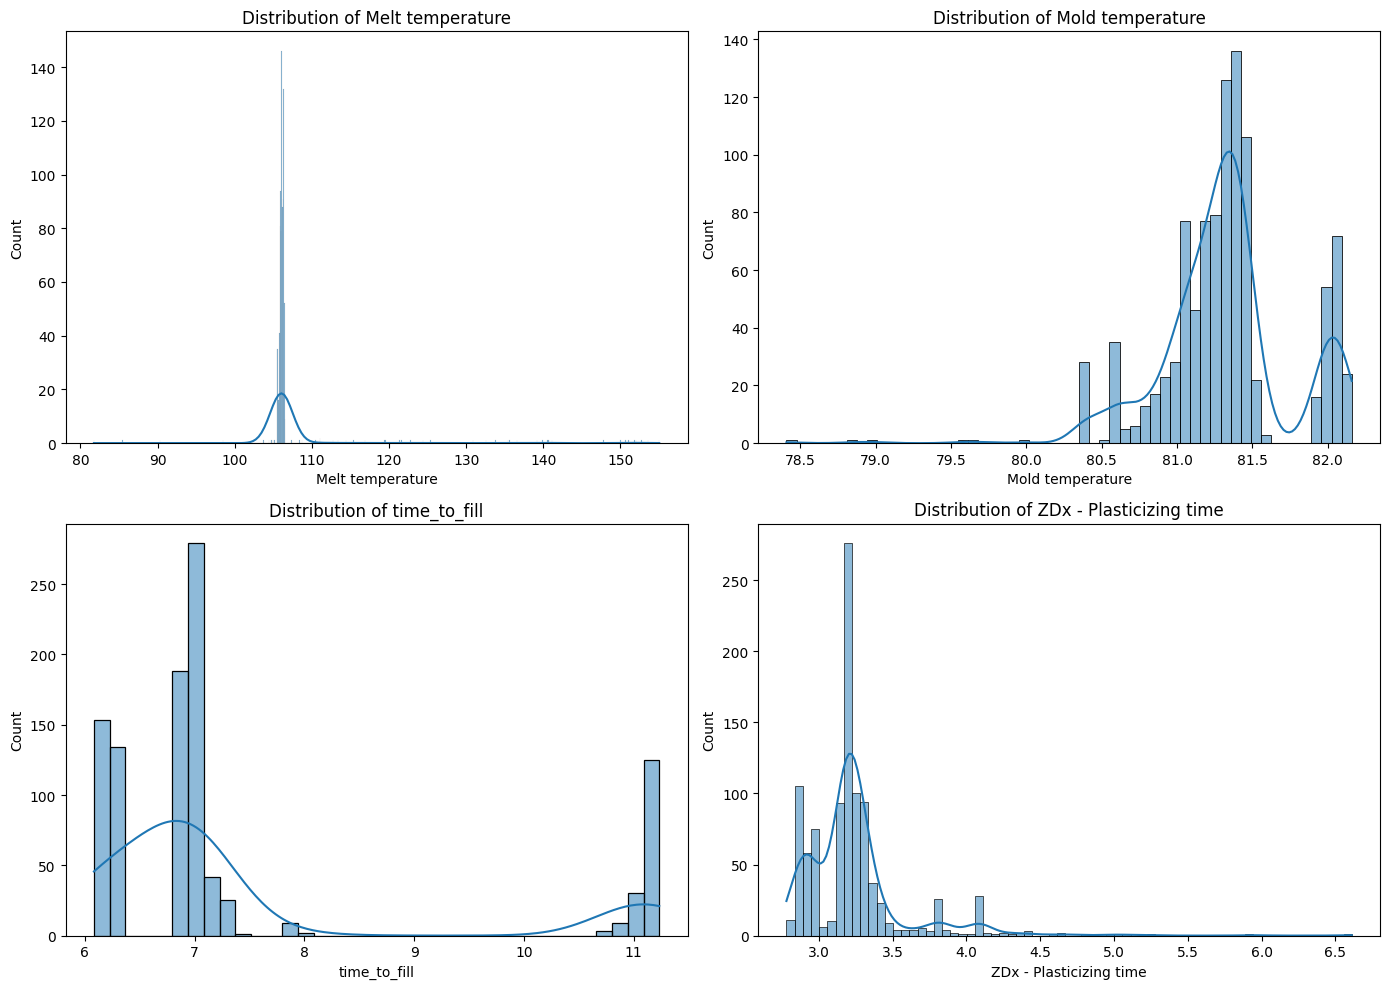

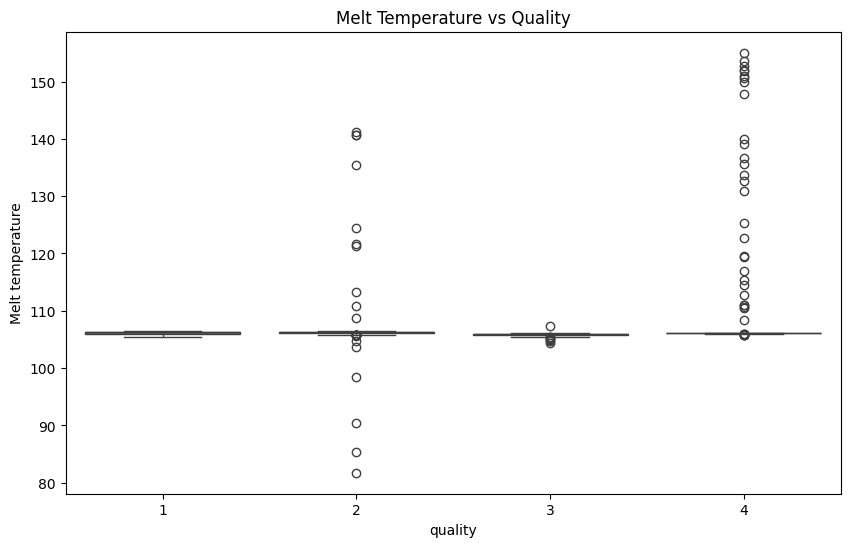

In [ ]:
## Visualizations
print("### Visualizations")
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Melt temperature', 'Mold temperature', 'time_to_fill', 'ZDx - Plasticizing time'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='Melt temperature', data=data)
plt.title('Melt Temperature vs Quality')
plt.show()

### Data Cleaning
#### Purpose
Identify and quantify outliers using the Interquartile Range (IQR) method.

#### Thought Process
- Outliers are defined as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
- We’ll print the number of outliers per column but not remove them, as tree-based models (e.g., RandomForest) are robust to outliers.

#### Expected Observation
Some features may have outliers (e.g., `APVs - Specific injection pressure peak value`). Since we’re using robust models, we’ll keep them.

In [ ]:
## Data Cleaning
print("### Data Cleaning")
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)

### Data Cleaning
Outliers per column:
 Melt temperature                                     51
Mold temperature                                    198
time_to_fill                                        167
ZDx - Plasticizing time                              86
ZUx - Cycle time                                      0
SKx - Closing force                                   0
SKs - Clamping force peak value                      55
Ms - Torque peak value current cycle                 41
Mm - Torque mean value current cycle                110
APSs - Specific back pressure peak value             15
APVs - Specific injection pressure peak value        44
CPn - Screw position at the end of hold pressure    107
SVo - Shot volume                                   103
quality                                               0
dtype: int64


### Feature Engineering
#### Purpose
Create a new feature to potentially improve model performance.

#### Thought Process
- Create a new feature `pressure_ratio` by dividing `APVs - Specific injection pressure peak value` by `APSs - Specific back pressure peak value`.
- This ratio may capture the relative pressure dynamics, potentially improving model performance.

#### Expected Observation
The new `pressure_ratio` feature should be added to the dataset, which may help models capture interactions between pressure-related features.

In [ ]:
## Feature Engineering
print("### Feature Engineering")
data['pressure_ratio'] = data['APVs - Specific injection pressure peak value'] / data['APSs - Specific back pressure peak value']

### Feature Engineering


### Train/Test Split and Standardization
#### Purpose
Split the data into training and testing sets, and standardize the features.

#### Thought Process
- Split the data into training (70%) and testing (30%) sets using `train_test_split` with `random_state` for reproducibility.
- Standardize features using `StandardScaler` to ensure all features are on the same scale, which is important for models like KNN and ANN.

#### Expected Observation
Data should be split into 70% training and 30% testing sets. Features should be standardized (mean=0, std=1) to improve model performance.

In [ ]:
## Train/Test Split and Standardization
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Section 2: Hypothesis Testing & ANOVA (15%)
### Purpose
Use ANOVA to test if each feature varies significantly across the four quality levels (1-4).

### Thought Process
- **Null Hypothesis (H0)**: The feature’s mean is the same across all quality levels.
- **Alternative Hypothesis (H1)**: The feature’s mean differs across quality levels.
- A low p-value (< 0.05) indicates statistical significance.

### Expected Observation
Features with p-values < 0.05 (e.g., `Melt temperature`) should be statistically significant predictors of quality, confirming their importance.

In [ ]:
# Section 2: Hypothesis Testing & ANOVA (15%)
print("\n## Section 2: Hypothesis Testing & ANOVA")
print("### ANOVA Results")
for col in X.columns:
    groups = [X[col][y == i] for i in range(1, 5)]  # Quality: 1-4
    f_stat, p_val = f_oneway(*groups)
    print(f"{col}: F-Statistic = {f_stat:.2f}, p-value = {p_val:.4f}")


## Section 2: Hypothesis Testing & ANOVA
### ANOVA Results
Melt temperature: F-Statistic = 17.35, p-value = 0.0000
Mold temperature: F-Statistic = 260.65, p-value = 0.0000
time_to_fill: F-Statistic = 219.10, p-value = 0.0000
ZDx - Plasticizing time: F-Statistic = 179.06, p-value = 0.0000
ZUx - Cycle time: F-Statistic = 10389.02, p-value = 0.0000
SKx - Closing force: F-Statistic = 117.63, p-value = 0.0000
SKs - Clamping force peak value: F-Statistic = 84.38, p-value = 0.0000
Ms - Torque peak value current cycle: F-Statistic = 16.21, p-value = 0.0000
Mm - Torque mean value current cycle: F-Statistic = 21.17, p-value = 0.0000
APSs - Specific back pressure peak value: F-Statistic = 34.84, p-value = 0.0000
APVs - Specific injection pressure peak value: F-Statistic = 268.74, p-value = 0.0000
CPn - Screw position at the end of hold pressure: F-Statistic = 186.43, p-value = 0.0000
SVo - Shot volume: F-Statistic = 191.07, p-value = 0.0000
pressure_ratio: F-Statistic = 235.37, p-value = 0.0000


## Section 3: Machine Learning Model Development (40%)
### Purpose
Train and evaluate multiple models to predict `quality`, including RandomForest, ExtraTrees, KNN, LightGBM, and ANN (mandatory).

### Thought Process
- Use `GridSearchCV` with 3-fold cross-validation to tune hyperparameters.
- Evaluate models using accuracy, precision, recall, F1-score, and ROC-AUC.

### Expected Observation
Models should train successfully. LightGBM previously showed the highest accuracy (0.926667). ANN performance will depend on the dataset.

### Evaluation Function
#### Purpose
Define a function to compute multiple metrics for consistent evaluation across models.

#### Thought Process
- Compute accuracy, precision, recall, and F1-score for overall performance.
- Compute ROC-AUC for multi-class classification performance.

#### Expected Observation
The evaluation function should be defined to compute all required metrics, ensuring fair comparison across models.

In [ ]:
## Evaluation Function
def evaluate_model(y_true, y_pred, y_prob=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }
    if y_prob is not None:
        metrics['ROC-AUC'] = roc_auc_score(y_true, y_prob, multi_class='ovr')
    return metrics

### ANN Wrapper for scikit-learn Compatibility
#### Purpose
Create a wrapper class for the ANN to make it compatible with `GridSearchCV` for consistent model comparison.

#### Thought Process
- The ANN has two hidden layers (64 and 32 neurons) with ReLU activation, and an output layer with softmax for 4 classes.
- Compile with Adam optimizer and sparse categorical crossentropy loss.

#### Expected Observation
The `ANNClassifier` wrapper should allow the ANN to be used with `GridSearchCV`, ensuring it’s evaluated like other models.

In [ ]:
## ANN Wrapper for scikit-learn Compatibility
class ANNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, epochs=20, batch_size=32):
        self.input_dim = input_dim
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        self.model = Sequential([
            Dense(64, activation='relu', input_shape=(self.input_dim,)),
            Dense(32, activation='relu'),
            Dense(4, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        y_prob = self.model.predict(X, verbose=0)
        return np.argmax(y_prob, axis=1)

    def predict_proba(self, X):
        return self.model.predict(X, verbose=0)

### Model Training and Evaluation
#### Purpose
Define models and hyperparameters, then train and evaluate them using `GridSearchCV`.

#### Thought Process
- Models: RandomForest, ExtraTrees, KNN, LightGBM, and ANN.
- Use 3-fold cross-validation to tune hyperparameters.
- Adjust `y_train` and `y_pred` for 0-based indexing (TensorFlow expects 0-3, but dataset has 1-4).

#### Expected Observation
LightGBM previously showed the highest accuracy (0.926667). ANN performance will depend on the dataset, but expect it to be competitive.

In [ ]:
## Model Training and Evaluation
models = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [10, 20]}),
    'ExtraTrees': (ExtraTreesClassifier(), {'n_estimators': [50, 100], 'max_depth': [10, 20]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'LightGBM': (LGBMClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    'ANN': (ANNClassifier(input_dim=X_train_scaled.shape[1]), {'epochs': [20], 'batch_size': [32]})
}

results = {}
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for name, (model, params) in models.items():
    print(f"\n### Training {name}")
    grid = GridSearchCV(model, params, cv=kf, scoring='accuracy')
    grid.fit(X_train_scaled, y_train - 1)
    y_pred = grid.predict(X_test_scaled) + 1
    y_prob = grid.predict_proba(X_test_scaled)
    results[name] = evaluate_model(y_test, y_pred, y_prob)
    print(f"Best Params: {grid.best_params_}")
    print(f"Results: {results[name]}")


### Training RandomForest
Best Params: {'max_depth': 20, 'n_estimators': 100}
Results: {'Accuracy': 0.9233333333333333, 'Precision': 0.924067310506292, 'Recall': 0.9233333333333333, 'F1-Score': 0.9231112685412808, 'ROC-AUC': np.float64(0.987954005565363)}

### Training ExtraTrees
Best Params: {'max_depth': 10, 'n_estimators': 50}
Results: {'Accuracy': 0.92, 'Precision': 0.9240080315237043, 'Recall': 0.92, 'F1-Score': 0.9197146322791948, 'ROC-AUC': np.float64(0.9852261772842943)}

### Training KNN
Best Params: {'n_neighbors': 3}
Results: {'Accuracy': 0.8766666666666667, 'Precision': 0.8891527712553864, 'Recall': 0.8766666666666667, 'F1-Score': 0.8755084551629815, 'ROC-AUC': np.float64(0.964746245808917)}

### Training LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 466, numb

Best Params: {'batch_size': 32, 'epochs': 20}
Results: {'Accuracy': 0.9, 'Precision': 0.9034794430782009, 'Recall': 0.9, 'F1-Score': 0.8995282810508053, 'ROC-AUC': np.float64(0.983113221736849)}


### Feature Importance (Random Forest)
#### Purpose
Use RandomForest to compute feature importance, identifying which features contribute most to quality prediction.

#### Thought Process
- Train a RandomForest model with the best hyperparameters found (`n_estimators=100`, `max_depth=20`).
- Plot feature importance as a horizontal bar chart.

#### Expected Observation
Features like `Melt temperature` and `pressure_ratio` may rank high, aligning with ANOVA results, indicating their predictive power.

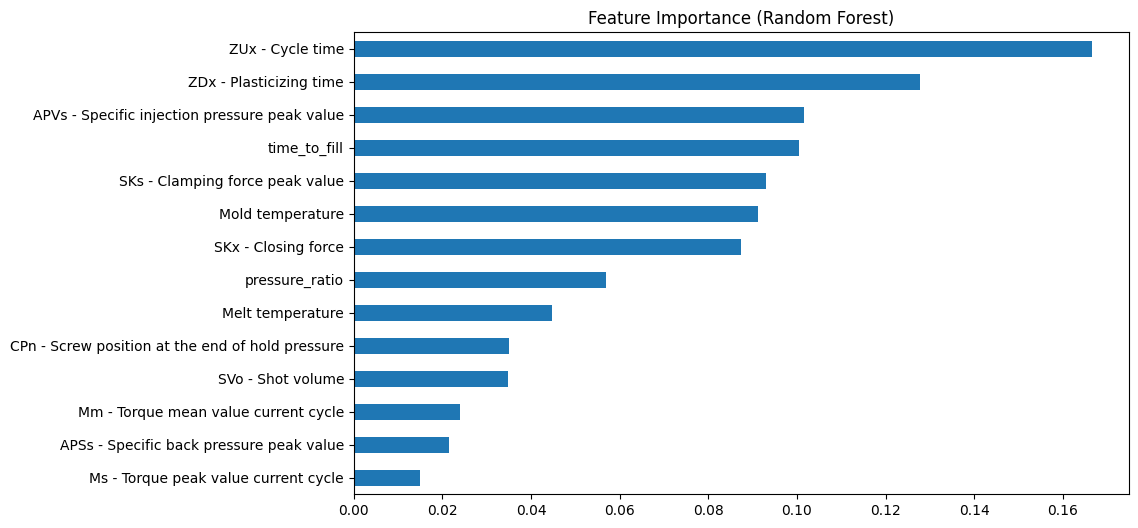

In [ ]:
## Feature Importance (Random Forest)
rf = RandomForestClassifier(n_estimators=100, max_depth=20).fit(X_train_scaled, y_train - 1)
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.show()

### Model Comparison
#### Purpose
Compile the evaluation results into a table for easy comparison across models.

#### Thought Process
- Include all models: RandomForest, ExtraTrees, KNN, LightGBM, and ANN.
- Metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC.

#### Expected Observation
LightGBM previously outperformed others (Accuracy: 0.926667). ANN should be competitive, but its performance depends on the dataset complexity.

In [ ]:
## Model Comparison
results_df = pd.DataFrame(results).T
print("\n### Model Comparison\n", results_df)


### Model Comparison
               Accuracy  Precision    Recall  F1-Score   ROC-AUC
RandomForest  0.923333   0.924067  0.923333  0.923111  0.987954
ExtraTrees    0.920000   0.924008  0.920000  0.919715  0.985226
KNN           0.876667   0.889153  0.876667  0.875508  0.964746
LightGBM      0.926667   0.927921  0.926667  0.926574  0.989547
ANN           0.900000   0.903479  0.900000  0.899528  0.983113


## Section 4: Interactive Dashboard Development (20%)
### Purpose
Create a Streamlit dashboard for interactive quality prediction.

### Thought Process
- Allow users to input key features via sliders.
- Use the trained RandomForest model for prediction.
- Display prediction probabilities, feature importance, and confusion matrix.

### Expected Observation
The dashboard should allow users to input key features and see the predicted quality, along with visualizations for interpretability.

In [ ]:
# Section 4: Interactive Dashboard Development (20%)
print("\n## Section 4: Interactive Dashboard Development")
dashboard_code = """
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data with encoding handling
try:
    data = pd.read_csv('dataset.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('dataset.csv', encoding='latin1')

data['pressure_ratio'] = data['APVs - Specific injection pressure peak value'] / data['APSs - Specific back pressure peak value']
X = data.drop('quality', axis=1)
y = data['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train RandomForest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20)
rf_model.fit(X_scaled, y - 1)

# Dashboard
st.title('Plastic Injection Moulding Quality Predictor')

# User Inputs
melt_temp = st.slider('Melt Temperature (°C)', float(X['Melt temperature'].min()), float(X['Melt temperature'].max()), 106.0)
mold_temp = st.slider('Mold Temperature (°C)', float(X['Mold temperature'].min()), float(X['Mold temperature'].max()), 81.0)
time_to_fill = st.slider('Time to Fill (s)', float(X['time_to_fill'].min()), float(X['time_to_fill'].max()), 6.5)
shot_volume = st.slider('Shot Volume (cm³)', float(X['SVo - Shot volume'].min()), float(X['SVo - Shot volume'].max()), 18.7)

# Prepare input (values are approximate medians from dataset)
input_data = pd.DataFrame([[
    melt_temp,  # Melt temperature
    mold_temp,  # Mold temperature
    time_to_fill,  # time_to_fill
    shot_volume,  # SVo - Shot volume
    550,  # APVs - Specific injection pressure peak value
    275,  # APSs - Specific back pressure peak value
    5.5,  # ZUX - Cycle time
    3.0,  # ZDx - Plasticizing time
    100,  # SKs - Clamping force peak value
    100,  # SKx - Closing force peak value
    5.5,  # CPn - Screw position at the end of hold pressure
    10,   # Mm - Torque mean value current cycle
    10,   # Ms - Torque peak value current cycle
    550/275  # pressure_ratio (APVs / APSs)
]], columns=X.columns)
input_scaled = scaler.transform(input_data)

# Prediction
pred = rf_model.predict(input_scaled)[0] + 1
probs = rf_model.predict_proba(input_scaled)[0]
quality_map = {1: 'Waste', 2: 'Acceptable', 3: 'Target', 4: 'Inefficient'}
st.write(f'Predicted Quality: **{quality_map[pred]}**')

# Layout for plots
col1, col2, col3 = st.columns(3)

# Probability Bar Chart
with col1:
    st.subheader('Prediction Probabilities')
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.bar(quality_map.values(), probs)
    ax.set_ylim(0, 1)
    plt.xticks(rotation=45)
    st.pyplot(fig)

# Feature Importance
with col2:
    st.subheader('Feature Importance')
    fig, ax = plt.subplots(figsize=(5, 3))
    feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
    feat_importance.sort_values().plot(kind='barh', ax=ax)
    ax.set_title('Feature Importance')
    st.pyplot(fig)

# Confusion Matrix
with col3:
    st.subheader('Confusion Matrix')
    y_pred_full = rf_model.predict(X_scaled) + 1
    cm = confusion_matrix(y, y_pred_full)
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    st.pyplot(fig)
"""

# Write the dashboard file
with open('dashboard.py', 'w', encoding='utf-8') as f:
    f.write(dashboard_code)
print("Dashboard code saved as 'dashboard.py'.")


## Section 4: Interactive Dashboard Development
Dashboard code saved as 'dashboard.py'.


### Launch Streamlit Dashboard
#### Purpose
Launch the Streamlit dashboard from Jupyter Notebook.

#### Thought Process
- Use `subprocess` to run the Streamlit app.
- The dashboard should open at `http://localhost:8501`.

#### Expected Observation
The dashboard should launch at `http://localhost:8501`, providing an interactive interface for quality prediction.

In [ ]:
## Launch Streamlit Dashboard
import subprocess
import sys
import time

print("Launching Streamlit dashboard...")
try:
    process = subprocess.Popen([sys.executable, "-m", "streamlit", "run", "dashboard.py"],
                               stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    time.sleep(3)
    print("Dashboard should be running. Open your browser to: http://localhost:8501")
    print("To stop the dashboard, interrupt the kernel (e.g., press 'I, I' in Jupyter or Ctrl+C in terminal).")
except Exception as e:
    print(f"Failed to launch dashboard: {e}")
    print("Try running 'streamlit run dashboard.py' manually in a terminal in the same directory.")

Launching Streamlit dashboard...
Dashboard should be running. Open your browser to: http://localhost:8501
To stop the dashboard, interrupt the kernel (e.g., press 'I, I' in Jupyter or Ctrl+C in terminal).
